In [ ]:
#import the libraries
from sklearn import datasets, metrics, svm, model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = datasets.load_iris()

X = data.data
y = data.target

ratio = 0.3

#split the data into 70:30
xtrain,xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=ratio, random_state=4)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

#create the svm model
model = svm.SVC(kernel="linear", gamma='scale', C=2)

#train the model
model.fit(xtrain, ytrain)

#predict the testing data model
ypred = model.predict(xtest)

#classiifcation report
report = metrics.classification_report(ytest, ypred)
print(report)

#print the accuracy
print("The accuracy is:", metrics.accuracy_score(ytest, ypred))

(105, 4) (105,)
(45, 4) (45,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

The accuracy is: 0.9777777777777777


**DIABETES.csv**

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/diabetes.csv")
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# X will be holding all the feature columns
X = data.drop("Outcome", axis=1, inplace=False)

# Y will be holding all the label columns
y = data['Outcome']

# split the data into 70:30 ratio
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

# create the svm classifier
dibts_model = svm.SVC(kernel="poly", gamma='scale', C=2)

# train the classifier
dibts_model.fit(xtrain, ytrain)

# predict the testing data
ypred = dibts_model.predict(xtest)

# classification report
report = metrics.classification_report(ytest, ypred)
print(report)

# print the accuracy
print("The accuracy is:", metrics.accuracy_score(ytest, ypred))

# confusion matrix
conf_mat = metrics.confusion_matrix(ytest, ypred)
print("\nThe confusion matrix is:\n", conf_mat)

(537, 8) (537,)
(231, 8) (231,)
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       152
           1       0.81      0.59      0.69        79

    accuracy                           0.81       231
   macro avg       0.81      0.76      0.78       231
weighted avg       0.81      0.81      0.81       231

The accuracy is: 0.8138528138528138

The confusion matrix is:
 [[141  11]
 [ 32  47]]


In [ ]:
# printing just the attributes without the labels
print(X.shape)
X.head()

(768, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
#Perform the EDA on the diabeties datasets.
#Exploratory Data Analysis.
#Perform the EDA on the diabeties datasets.
#Exploratory Data Analysis.
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of each feature in a subplot
plt.figure(figsize=(12, 10))
for i, col in enumerate(data.columns):
  plt.subplot(3, 3, i + 1)
  sns.histplot(data[col])
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()
print("\n")

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
print("\n")

# Pairplot
sns.pairplot(data, hue='Outcome')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

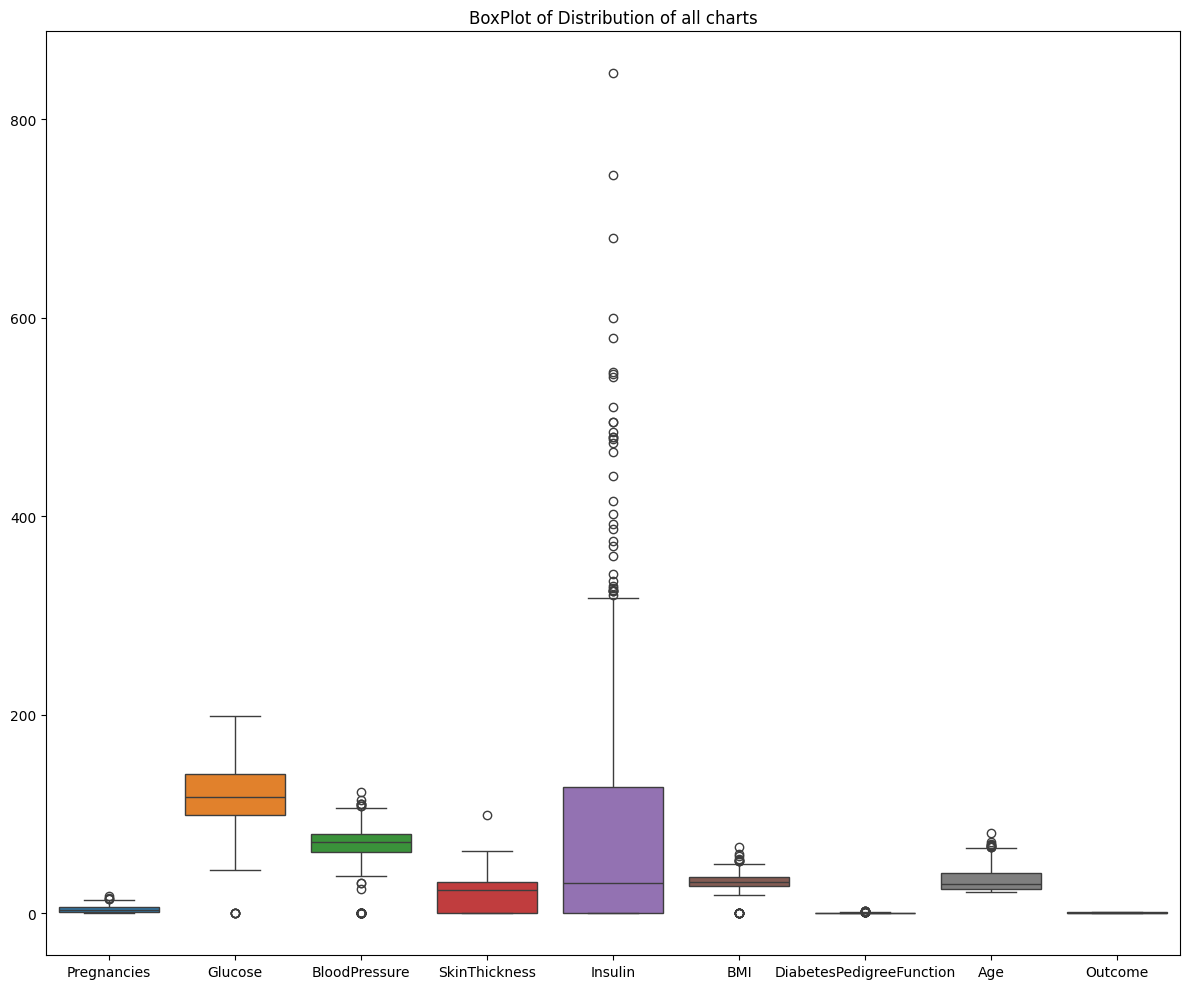

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=data)
plt.title("BoxPlot of Distribution of all charts")
plt.tight_layout()
plt.show()

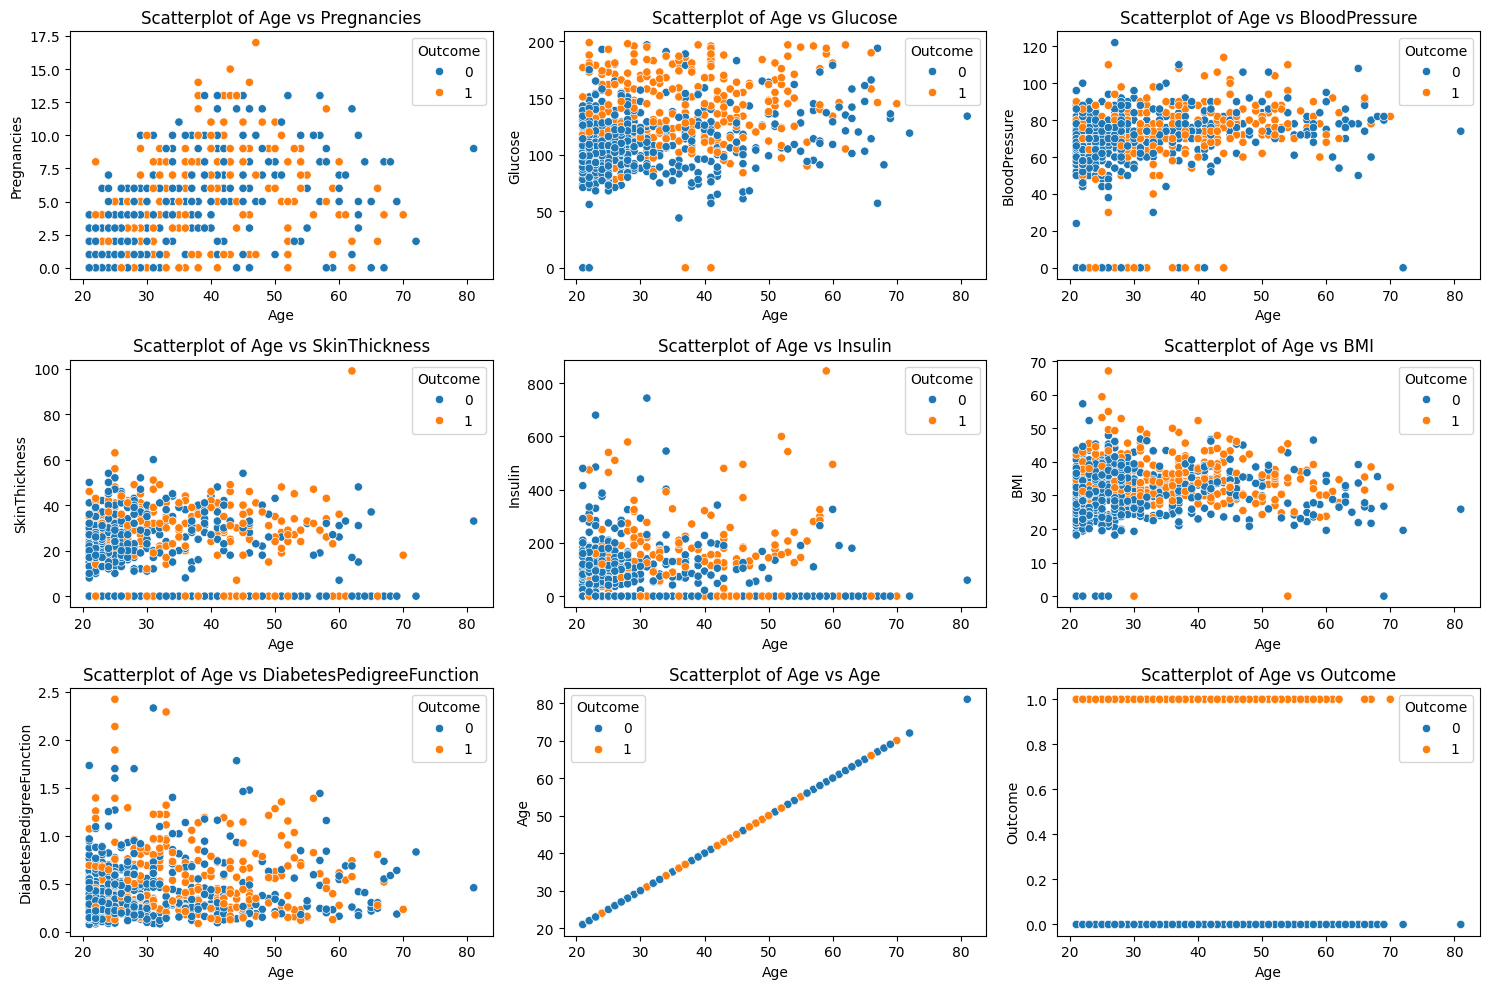

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
  plt.subplot(3, 3, i + 1)
  sns.scatterplot(data=data, x='Age', y=col, hue='Outcome')
  plt.title(f"Scatterplot of Age vs {col}")
plt.tight_layout()
plt.show()

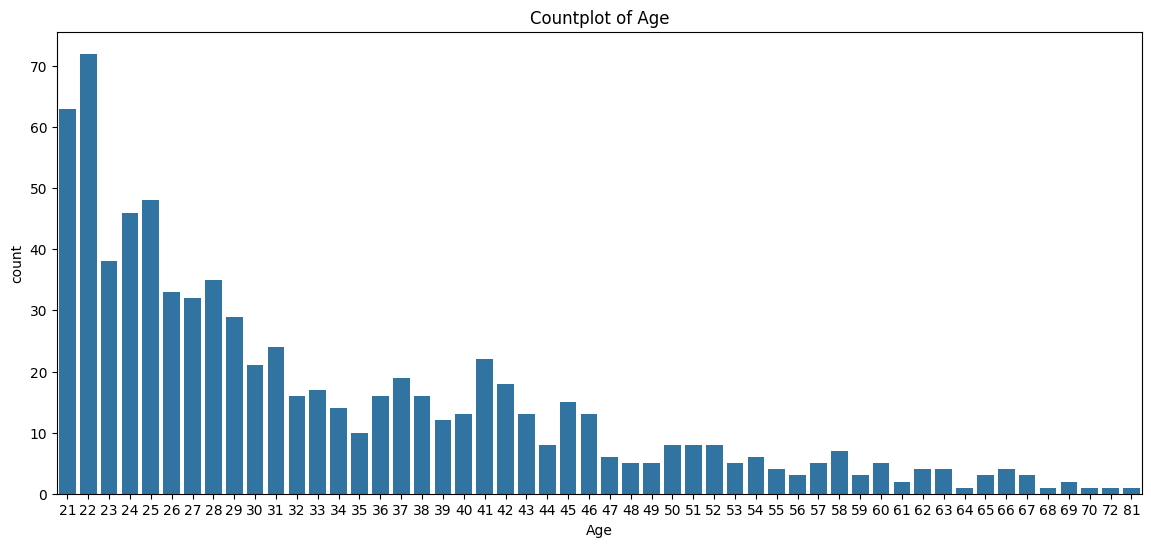

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='Age')
plt.title("Countplot of Age")
#plt.tight_layout()
plt.show()

In [ ]:
print("Maximum Age is:", max(data['Age']))
print("\nMinimum Age is:", min(data['Age']))

Maximum Age is: 81

Minimum Age is: 21


In [ ]:
#Now, we need to add the column called age_category!
# 1. If age<=30 shows 'Young'.
# 2. If age>=31 & age<=44 shows 'Middle_Age'.
# 3. If age>=46 & age<=65 shows 'Mature_Age'.
# 4. If age>=65 shows 'old_age'.

def age_category(age):
  if(age<=30):
    return 'Young Age';
  elif(age>=31 and age<=44):
    return 'Middle Age';
  elif(age>=46 and age<=65):
    return 'Mature Age';
  else:
    return 'Old Age';

Age=data['Age'];
data['Age_Category'] = data['Age'].apply(age_category);
print(data.head());

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome Age_Category Age Category  \
0                     0.627   50        1   Mature Age   Mature Age   
1                     0.351   31        0   Middle Age   Middle Age   
2                     0.672   32        1   Middle Age   Middle Age   
3                     0.167   21        0    Young Age        Young   
4                     2.288   33        1   Middle Age   Middle Age   

  AgeCategory  
0  Mature Age  
1  Middle Age  
2  Middle Age  
3       Young  
4  Middle Age  


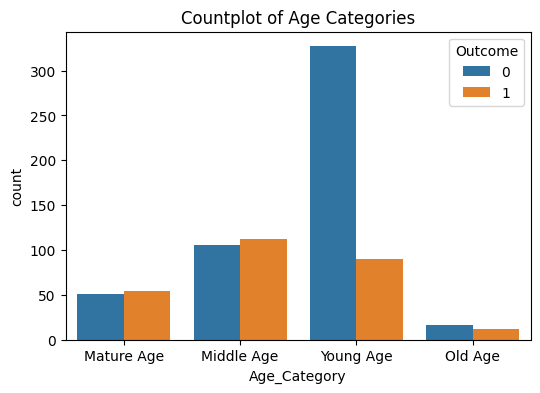

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Age_Category', hue='Outcome')
plt.title("Countplot of Age Categories")
#plt.tight_layout()
plt.show()

In [80]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/diabetes.csv")
print(data.shape)
data.head()

# X will be holding all the feature columns
X = data.drop("Outcome", axis=1, inplace=False)

# Y will be holding all the label columns
y = data['Outcome']

# split the data into 70:30 ratio
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

ker = ['linear','rbf','poly']
c_val = [1,2,3]

for i in range(len(ker)):
  for j in range(len(c_val)):
    # create the svm classifier
    dibts_model = svm.SVC(kernel=ker[i], gamma='scale', C=c_val[i])

    # train the classifier
    dibts_model.fit(xtrain, ytrain)

    # predict the testing data
    ypred = dibts_model.predict(xtest)

    # print the accuracy
    print("The accuracy is:", metrics.accuracy_score(ytest, ypred))

(768, 9)
(537, 8) (537,)
(231, 8) (231,)
The accuracy is: 0.8051948051948052
The accuracy is: 0.8051948051948052
The accuracy is: 0.8051948051948052
The accuracy is: 0.8225108225108225
The accuracy is: 0.8225108225108225
The accuracy is: 0.8225108225108225
The accuracy is: 0.8095238095238095
The accuracy is: 0.8095238095238095
The accuracy is: 0.8095238095238095


In [81]:
import pandas as pd
import numpy as np

data= pd.read_csv("/content/diabetes.csv")
print(data.shape)
data.head()
# X will be holding all the feature columns
X = data.drop('Outcome',axis=1,inplace=False)

# y will be holding all the labels column
y = data['Outcome']


# split the data into 70:30 ratio
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    dibts_svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    dibts_svm_model = dibts_svm_model.fit(Xtrain,ytrain)

    # predict the labels
    ypred = dibts_svm_model.predict(Xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])

(768, 9)
(537, 8) (537,)
(231, 8) (231,)
[[0.78787879 0.78787879 0.77922078]
 [0.7965368  0.7965368  0.7965368 ]
 [0.78354978 0.77489177 0.76623377]]


In [82]:
ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
ResultDF = ResultDF.T
print(ResultDF)

         poly    linear       rbf
C=1  0.787879  0.796537  0.783550
C=2  0.787879  0.796537  0.774892
C=3  0.779221  0.796537  0.766234


<Axes: >

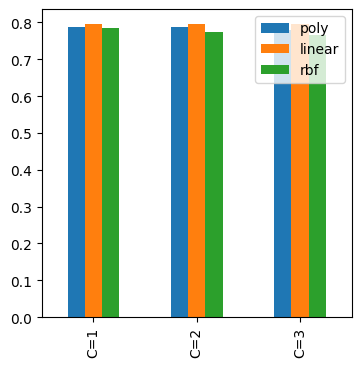

In [83]:
ResultDF.plot(kind='bar',figsize=(4,4))

**FISH.csv**

In [85]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/Fish.csv")
print(data.shape)
data.head()

(159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [90]:
# X will be holding all the feature columns
X = data.drop("Species", axis=1, inplace=False) #attributes

# Y will be holding all the label columns
y = data['Species'] #label

# split the data into 70:30 ratio
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

# create the svm classifier
dibts_model = svm.SVC(kernel="linear", gamma='scale', C=2)

# train the classifier
dibts_model.fit(xtrain, ytrain)

# predict the testing data
ypred = dibts_model.predict(xtest)

# classification report
report = metrics.classification_report(ytest, ypred)
print(report)

# print the accuracy
print("The accuracy is:", metrics.accuracy_score(ytest, ypred))

# confusion matrix
conf_mat = metrics.confusion_matrix(ytest, ypred)
print("\nThe confusion matrix is:\n", conf_mat)

(111, 6) (111,)
(48, 6) (48,)
              precision    recall  f1-score   support

       Bream       1.00      0.94      0.97        17
      Parkki       0.75      1.00      0.86         3
       Perch       0.94      1.00      0.97        16
        Pike       1.00      1.00      1.00         4
       Roach       1.00      0.83      0.91         6
       Smelt       1.00      1.00      1.00         2

    accuracy                           0.96        48
   macro avg       0.95      0.96      0.95        48
weighted avg       0.96      0.96      0.96        48

The accuracy is: 0.9583333333333334

The confusion matrix is:
 [[16  1  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  1  0  5  0]
 [ 0  0  0  0  0  2]]


In [88]:
# dropped the label
# printing just the attributes without the labels
print(X.shape)
X.head()

(159, 6)


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


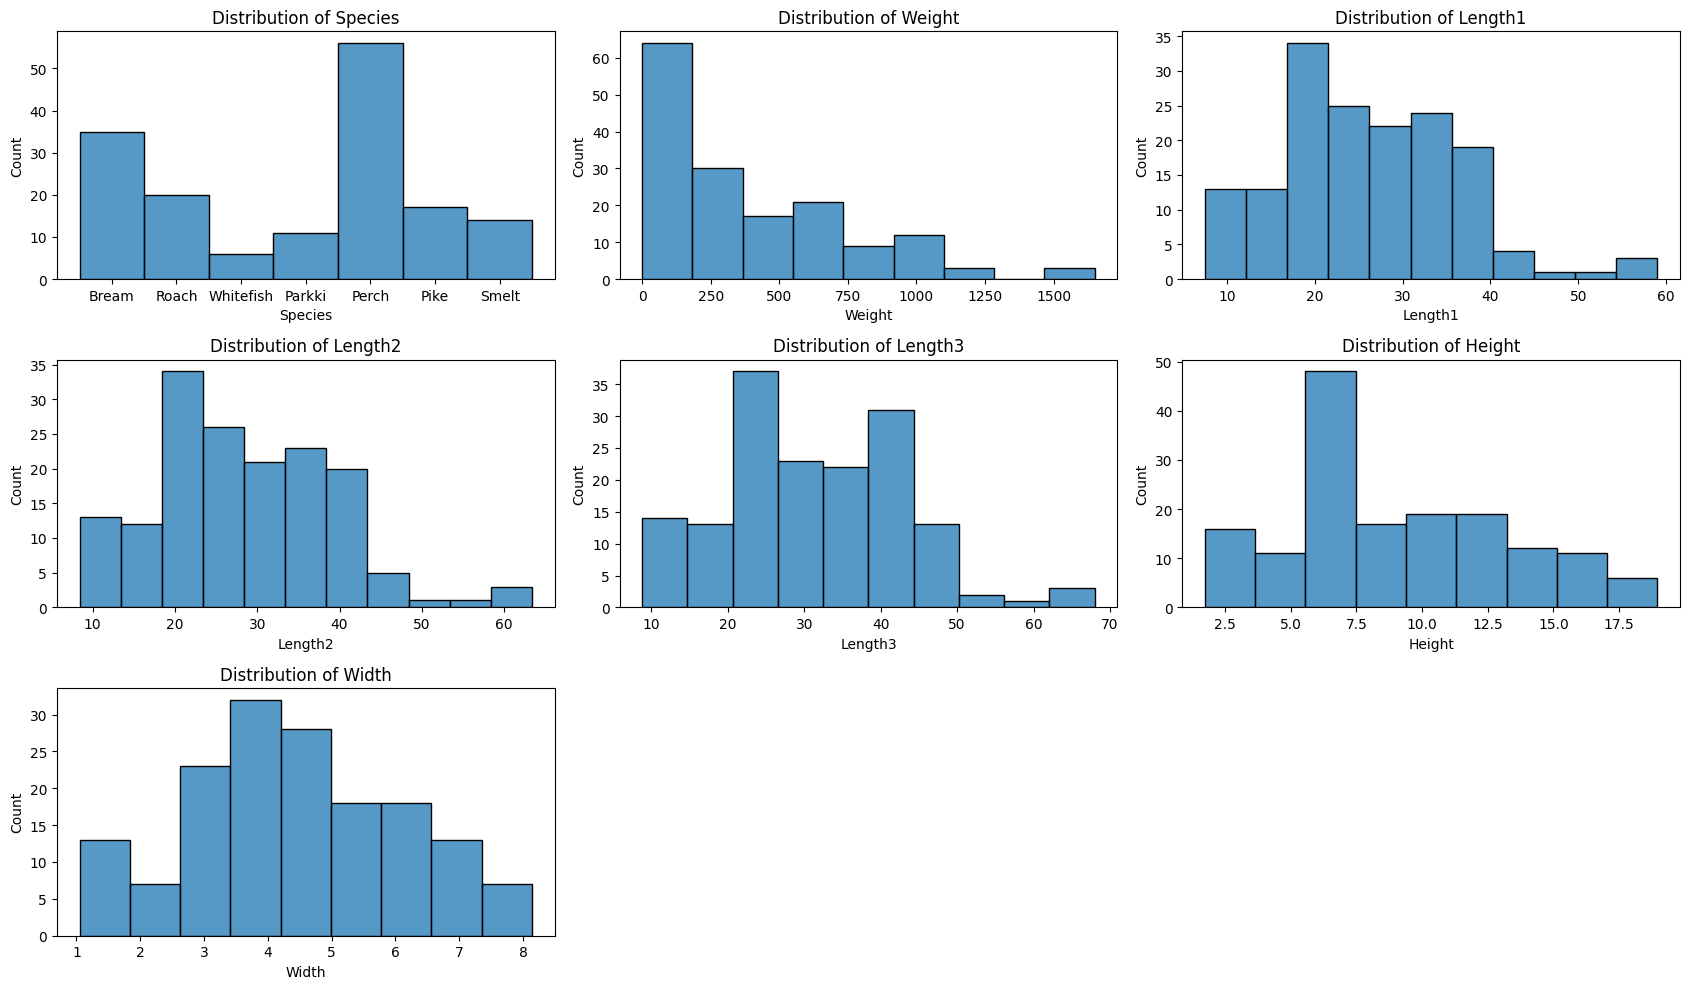

In [95]:
#Perform the EDA on the fish datasets.
#Exploratory Data Analysis.

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of each feature in a subplot
plt.figure(figsize=(17, 10))
for i, col in enumerate(data.columns):
  plt.subplot(3, 3, i + 1)
  sns.histplot(data[col])
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()
print("\n")

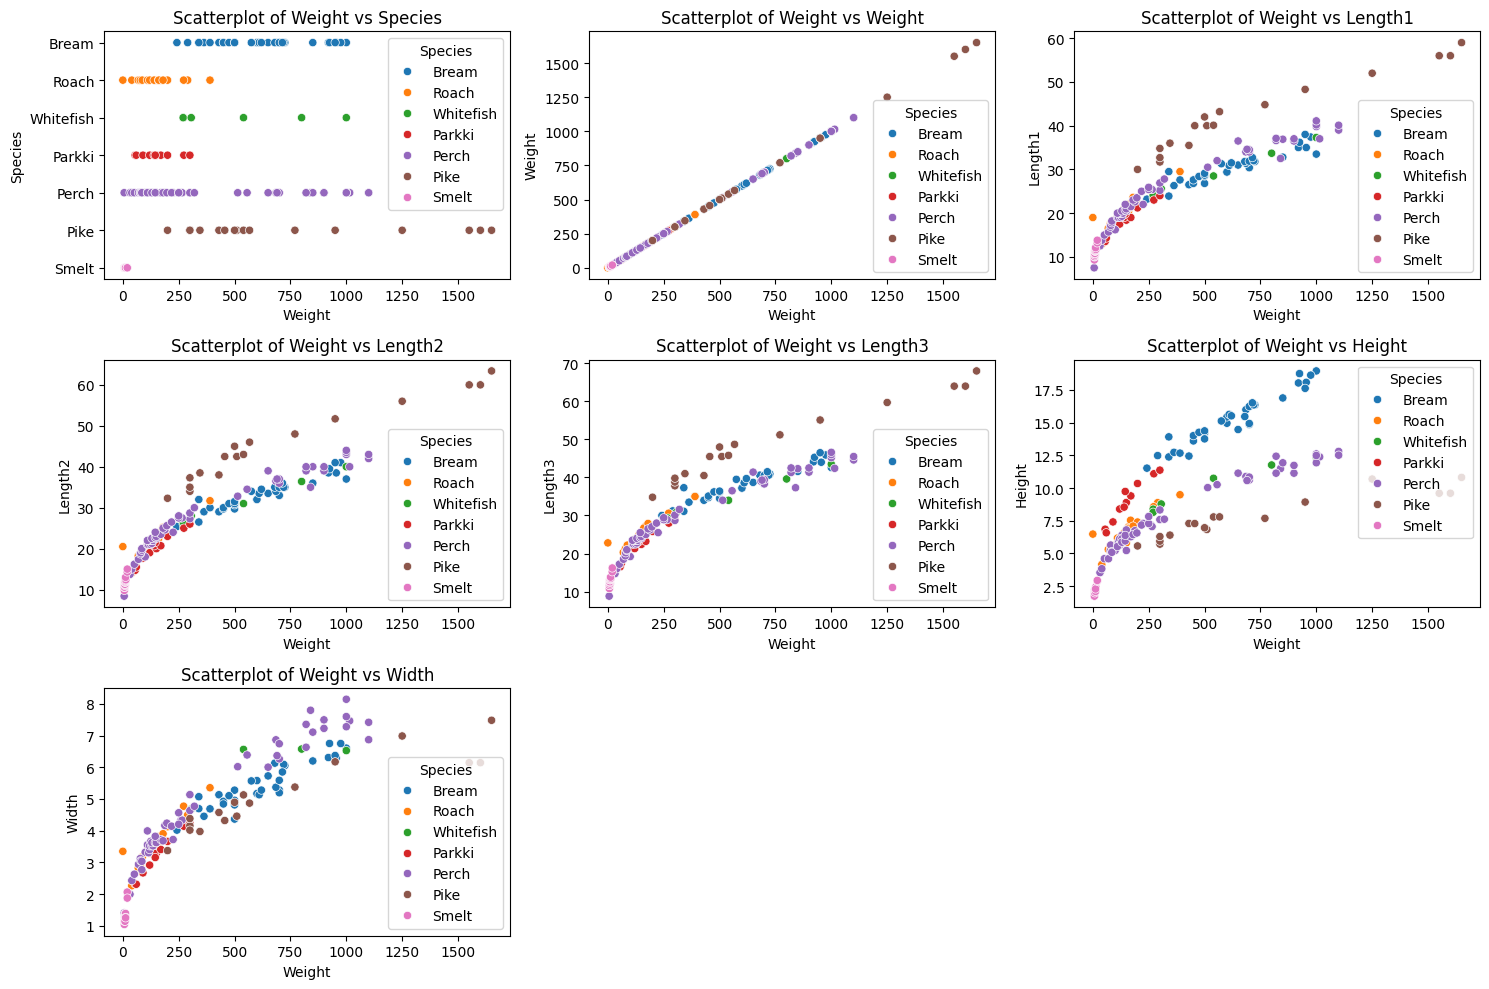

In [96]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
  plt.subplot(3, 3, i + 1)
  sns.scatterplot(data=data, x='Weight', y=col, hue='Species')
  plt.title(f"Scatterplot of Weight vs {col}")
plt.tight_layout()
plt.show()

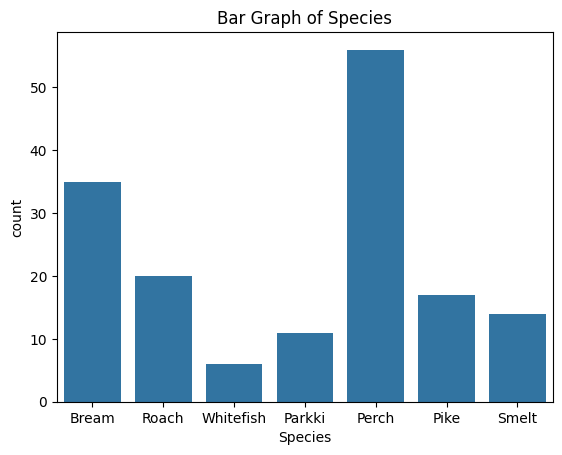

In [100]:
plt.figure(2)
sns.countplot(data=data, x='Species')
plt.title("Bar Graph of Species")
#plt.tight_layout()
plt.show()

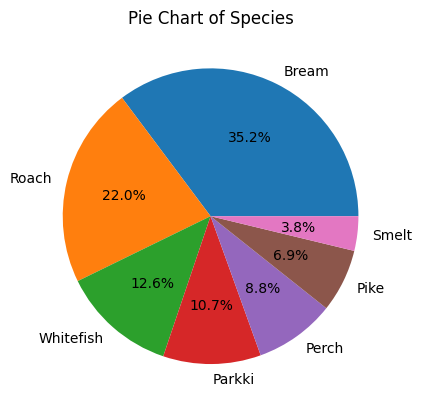

In [104]:
plt.figure(2)
plt.pie(data['Species'].value_counts(), labels=data['Species'].unique(), autopct='%1.1f%%')
plt.title("Pie Chart of Species")
plt.show()

(159, 7)
(111, 6) (111,)
(48, 6) (48,)


[[0.3125     0.3125     0.33333333]
 [0.85416667 0.875      0.85416667]
 [0.47916667 0.4375     0.4375    ]]


         poly    linear       rbf
C=1  0.312500  0.854167  0.479167
C=2  0.312500  0.875000  0.437500
C=3  0.333333  0.854167  0.437500




<Axes: >

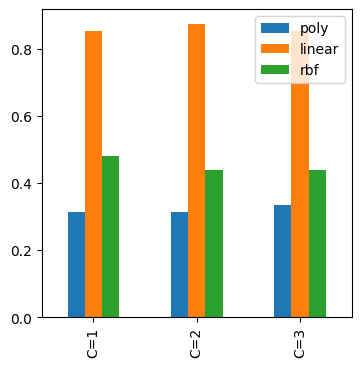

In [106]:
import pandas as pd
import numpy as np

data= pd.read_csv("/content/Fish.csv")
print(data.shape)
data.head()
# X will be holding all the feature columns
X = data.drop('Species',axis=1,inplace=False)

# y will be holding all the labels column
y = data['Species']


# split the data into 70:30 ratio
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)
print("\n")

ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    dibts_svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    dibts_svm_model = dibts_svm_model.fit(Xtrain,ytrain)

    # predict the labels
    ypred = dibts_svm_model.predict(Xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)
print("\n")

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
ResultDF = ResultDF.T
print(ResultDF)
print("\n")

ResultDF.plot(kind='bar',figsize=(4,4))

AttributeError: 'SVC' object has no attribute 'tree_'

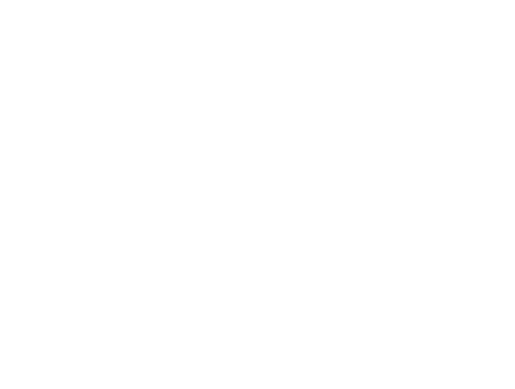

In [108]:
!pip install scikit-learn
import sklearn.tree as tree # Import the tree module from sklearn

tree.plot_tree(dibts_model)

[Text(0.6847826086956522, 0.9583333333333334, 'x[4] <= 12.637\ngini = 0.773\nsamples = 111\nvalue = [26, 6, 41, 12, 10, 12, 4]'),
 Text(0.5978260869565217, 0.875, 'x[0] <= 25.95\ngini = 0.729\nsamples = 87\nvalue = [3, 6, 40, 12, 10, 12, 4]'),
 Text(0.5543478260869565, 0.7916666666666666, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 0, 12, 0]'),
 Text(0.6413043478260869, 0.7916666666666666, 'x[3] <= 47.3\ngini = 0.661\nsamples = 75\nvalue = [3, 6, 40, 12, 10, 0, 4]'),
 Text(0.5978260869565217, 0.7083333333333334, 'x[2] <= 23.45\ngini = 0.631\nsamples = 70\nvalue = [3, 6, 40, 7, 10, 0, 4]'),
 Text(0.391304347826087, 0.625, 'x[4] <= 7.713\ngini = 0.635\nsamples = 28\nvalue = [0, 6, 13, 0, 9, 0, 0]'),
 Text(0.34782608695652173, 0.5416666666666666, 'x[3] <= 24.6\ngini = 0.526\nsamples = 23\nvalue = [0, 1, 13, 0, 9, 0, 0]'),
 Text(0.30434782608695654, 0.4583333333333333, 'x[2] <= 20.9\ngini = 0.46\nsamples = 19\nvalue = [0, 1, 13, 0, 5, 0, 0]'),
 Text(0.21739130434782608, 0.375, 'x[3] <=

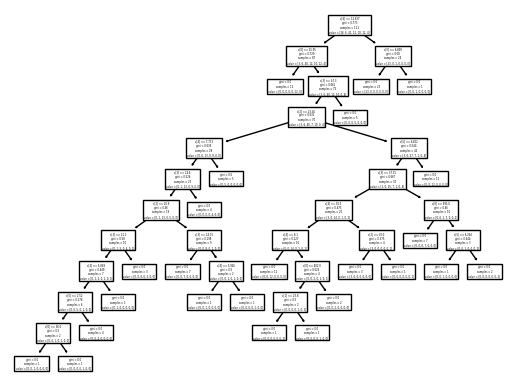

In [110]:
!pip install scikit-learn
import sklearn.tree as tree # Import the tree module from sklearn

# Assuming 'dibts_model' should be a decision tree, create one
from sklearn.tree import DecisionTreeClassifier
dibts_model = DecisionTreeClassifier()
# Fit the model to your data (replace X_train and y_train with your actual data)
dibts_model.fit(Xtrain, ytrain)  # Use Xtrain and ytrain (lowercase 't')

tree.plot_tree(dibts_model)